### SVM for Non-Linear Data Sets

An example of non-linear data is:

![SVM's for Non-Linear Data Sets](./img/non_linear_svm.png)

In this case we cannot find a straight line to separate apples from lemons. So how can we solve this problem. We will use the Kernel Trick!

The basic idea is that when a data set is inseparable in the current dimensions, add another dimension, maybe that way the data will be separable. 

The example above is in 2D and it is inseparable, but maybe in 3D there is a gap between the apples and the lemons, maybe there is a level difference, so apples are on level one and lemons are on level two. In this case we can easily draw a separating hyperplane (in 3D a hyperplane is a plane) between level 1 and 2.

Let's assume that we add another dimension called X3. Another important transformation is that in the new dimension the points are organized using this formula x1² + x2².

If we plot the plane defined by the x² + y² formula, we will get something like this:

![3d_SVM](./img/3d_svm.png)

Now we have to map the apples and lemons (which are just simple points) to this new space. 

What did we do? We just used a transformation in which we added levels based on distance. 

If you are in the origin, then the points will be on the lowest level. As we move away from the origin, it means that we are climbing the hill (moving from the center of the plane towards the margins) so the level of the points will be higher. 

Now if we consider that the origin is the lemon from the center, we will have something like this:

![Transformed SVM](./img/transformed_svm.png)

Now we can easily separate the two classes. These transformations are called kernels.
Popular kernels are: Polynomial Kernel, Gaussian Kernel, Radial Basis Function (RBF), Laplace RBF Kernel, Sigmoid Kernel, Anove RBF Kernel, etc 

Another example would be:

![](./img/1d_svm.png)

After using the kernel and after all the transformations we will get:

![](./img/transformed_1d_kernel.png)

So after the transformation, we can easily delimit the two classes using just a single line.

In real life applications we won’t have a simple straight line, but we will have lots of curves and high dimensions. In some cases we won’t have two hyperplanes which separates the data with no points between them, so we need some trade-offs, tolerance for outliers. 

Fortunately the SVM algorithm has a so-called regularization parameter to configure the trade-off and to tolerate outliers.

#### Regularisation

The Regularization Parameter (in python it’s called C) tells the SVM optimization how much you want to avoid miss classifying each training example.

If the C is higher, the optimization will choose smaller margin hyperplane, so training data miss classification rate will be lower.

On the other hand, if the C is low, then the margin will be big, even if there will be miss classified training data examples. This is shown in the following two diagrams:

![](./img/reg_svm.png)

As you can see in the image, when the C is low, the margin is higher (so implicitly we don’t have so many curves, the line doesn’t strictly follows the data points) even if two apples were classified as lemons. When the C is high, the boundary is full of curves and all the training data was classified correctly. 


**Note:** even if all the training data was correctly classified, this doesn’t mean that increasing the C will always increase the precision (because of overfitting).

#### Examples of SVM kernels

- Polynomial kernel
It is popular in image processing.
Equation is:

![](./img/polynomial-kernel.png)

where d is the degree of the polynomial.

- Gaussian kernel
It is a general-purpose kernel; used when there is no prior knowledge about the data. Equation is:

![](./img/gaussian-kernel.png)

- Sigmoid kernel
We can use it as the proxy for neural networks. Equation is

![](./img/sigmoid-kernel.png)

### Understanding the Multiple Linear Regression

**Linear regression** is a linear approach to modelling the relationship between a scalar response and one or more explanatory variables (also known as dependent and independent variables).

The case of one independent variable is called simple linear regression; for more than one, the process is called **multiple linear regression.**

Formula and Calculation of Multiple Linear Regression
\begin{aligned}&y_i = \beta_0 + \beta _1 x_{i1} + \beta _2 x_{i2} + ... + \beta _p x_{ip} + \epsilon\\&\textbf{where, for } i = n \textbf{ observations:}\\&y_i=\text{dependent variable}\\&x_i=\text{explanatory variables}\\&\beta_0=\text{y-intercept (constant term)}\\&\beta_p=\text{slope coefficients for each explanatory variable}\\&\epsilon=\text{the model's error term (also known as the residuals)}\end{aligned}.

#### Assumptions of multiple linear regression:
    
    
Multiple linear regression makes all of the same assumptions as simple linear regression:

- Homogeneity of variance (homoscedasticity): the size of the error in our prediction doesn’t change significantly across the values of the independent variable.

- Independence of observations: the observations in the dataset were collected using statistically valid methods, and there are no hidden relationships among variables.

In multiple linear regression, it is possible that some of the independent variables are actually correlated with one another, so it is important to check these before developing the regression model. If two independent variables are too highly correlated (r2 > ~0.6), then only one of them should be used in the regression model.

- Normality: The data follows a normal distribution.

- Linearity: the line of best fit through the data points is a straight line, rather than a curve or some sort of grouping factor.

##### Example: The Wine Dataset

In [66]:
#import libraries
import pandas as pd
import numpy as np

In [67]:
#import dataset
df_wine = pd.read_csv('./data/winequality-red.csv')

df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [68]:
df_wine.corr()   #column correlations

#only works for numeric columns and not for categorical columns

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


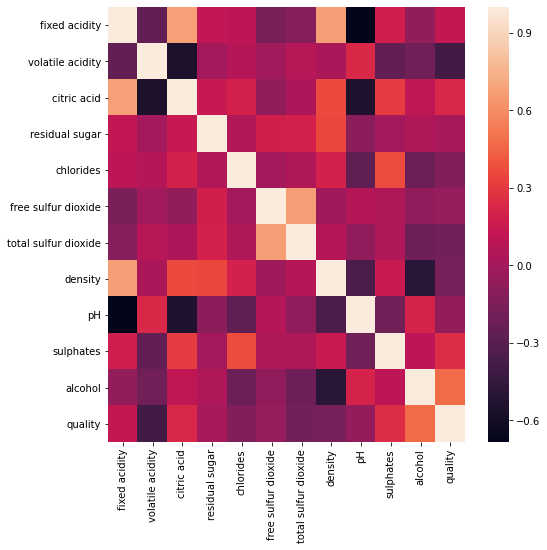

In [69]:
#plot the correlation of df on a heatmap

import seaborn as sns                #pls install seaborn
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
sns.heatmap(df_wine.corr())

plt.show()

In [70]:
#quality -- statistic
df_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


#definition

if quality is > 6.5 => "good"
else => "bad"

In [71]:
#build a regression model to predict the wine quality.

#check for null values

df_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [72]:
#assign x and y

y = df_wine.quality
x = df_wine.drop('quality',axis=1)

#train test split

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [73]:
#build a linear regression model
from sklearn.linear_model import LinearRegression

lr = LinearRegression()   #instiantiate the Linear Regression

In [74]:
#fit the model

lr.fit(x_train,y_train)

LinearRegression()

In [75]:
x_test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
803,7.7,0.56,0.08,2.50,0.114,14.0,46.0,0.9971,3.24,0.66,9.6
124,7.8,0.50,0.17,1.60,0.082,21.0,102.0,0.9960,3.39,0.48,9.5
350,10.7,0.67,0.22,2.70,0.107,17.0,34.0,1.0004,3.28,0.98,9.9
682,8.5,0.46,0.31,2.25,0.078,32.0,58.0,0.9980,3.33,0.54,9.8
1326,6.7,0.46,0.24,1.70,0.077,18.0,34.0,0.9948,3.39,0.60,10.6


In [76]:
#make a prediction

pred_wine = lr.predict(x_test)


#calculate the error --- mean_absolute error

from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test,pred_wine)

0.4998799122925448

In [77]:
from sklearn.metrics import mean_absolute_percentage_error

mean_absolute_percentage_error(y_test,pred_wine)

0.09018549750614405

In [78]:
#x_test['predicted_values'] = pred_wine
#x_test['original_values'] = y_test

#x_test.head(15)

In [86]:
#build a svm regressor

from sklearn.svm import SVR

svr_wine = SVR(kernel='linear',C=1.0)  #instantiate the svm regressor

#fit the svm
svr_wine.fit(x_train,y_train)

SVR(kernel='linear')

In [87]:
pred_wine_svr = svr_wine.predict(x_test)

#calculate the error --- mean_absolute error

from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test,pred_wine_svr)

0.4992479034112635

In [88]:
from sklearn.metrics import mean_absolute_percentage_error

mean_absolute_percentage_error(y_test,pred_wine_svr)

0.08943465751259595

In [63]:
#x_test['predicted_lr'] = pred_wine    #from linear regression
#x_test['original_values'] = y_test
#x_test['predicted_svm']  = pred_wine_svr  #from the support vector machines

#x_test.head(15)

/Users/admin/anaconda3/envs/dsr/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/admin/anaconda3/envs/dsr/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/admin/anaconda3/envs/dsr/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,predicted_lr,original_values,predicted_svm
803,7.7,0.56,0.08,2.50,0.114,14.0,46.0,0.99710,3.24,0.66,9.60,5.343602,6,5.402565
124,7.8,0.50,0.17,1.60,0.082,21.0,102.0,0.99600,3.39,0.48,9.50,5.062950,5,5.077830
350,10.7,0.67,0.22,2.70,0.107,17.0,34.0,1.00040,3.28,0.98,9.90,5.633332,6,5.860120
682,8.5,0.46,0.31,2.25,0.078,32.0,58.0,0.99800,3.33,0.54,9.80,5.451762,5,5.745412
1326,6.7,0.46,0.24,1.70,0.077,18.0,34.0,0.99480,3.39,0.60,10.60,5.745704,6,5.789086
976,7.2,0.41,0.30,2.10,0.083,35.0,72.0,0.99700,3.44,0.52,9.40,5.276379,5,5.542525
1493,7.7,0.54,0.26,1.90,0.089,23.0,147.0,0.99636,3.26,0.59,9.70,5.030606,5,5.083478
706,7.0,0.78,0.08,2.00,0.093,10.0,19.0,0.99560,3.40,0.47,10.00,5.145486,5,5.735434
613,8.2,0.39,0.38,1.50,0.058,10.0,29.0,0.99620,3.26,0.74,9.80,5.747934,5,5.603513
1587,5.8,0.61,0.11,1.80,0.066,18.0,28.0,0.99483,3.55,0.66,10.90,5.713796,6,5.873408


##### Example: The Glass data

In [105]:
df_glass = pd.read_csv('./data/glass.csv')

df_glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [106]:
df_glass.Type.value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [107]:
#build a classification model to predict the glass type

df_glass.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [108]:
#assign x and y

y = df_glass.Type
x = df_glass.drop('Type',axis = 1)

#split the dataset
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [109]:
#build the Logistic Regression

from sklearn.linear_model import LogisticRegression

lc = LogisticRegression()  #instiantiate the Logistic Regression


#fit the model
lc.fit(x_train,y_train)

/Users/admin/anaconda3/envs/dsr/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [110]:
lc_pred = lc.predict(x_test)

#calculate the error

from sklearn.metrics import f1_score

f1_score(y_test,lc_pred, average='micro')

0.7209302325581395

In [111]:
#build a svm classifier

from sklearn.svm import SVC

glass_svc = SVC(kernel='linear')

glass_svc.fit(x_train,y_train)

SVC(kernel='linear')

In [112]:
svc_pred = glass_svc.predict(x_test)

#calculate the error

from sklearn.metrics import f1_score

f1_score(y_test,svc_pred, average='micro')

0.7441860465116278

In [113]:
x_test['predicted_lr'] = lc_pred    #from linear regression
x_test['original_values'] = y_test
x_test['predicted_svm']  = svc_pred  #from the support vector machines

x_test.head(15)

/Users/admin/anaconda3/envs/dsr/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/admin/anaconda3/envs/dsr/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/admin/anaconda3/envs/dsr/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,predicted_lr,original_values,predicted_svm
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.00,0.11,1,1,1
197,1.51727,14.70,0.00,2.34,73.28,0.00,8.95,0.66,0.00,7,7,7
66,1.52152,13.05,3.65,0.87,72.22,0.19,9.85,0.00,0.17,1,1,1
191,1.51602,14.85,0.00,2.38,73.28,0.00,8.76,0.64,0.09,7,7,7
117,1.51708,13.72,3.68,1.81,72.06,0.64,7.88,0.00,0.00,2,2,2
111,1.52739,11.02,0.00,0.75,73.08,0.00,14.96,0.00,0.00,2,2,2
15,1.51761,12.81,3.54,1.23,73.24,0.58,8.39,0.00,0.00,1,1,1
86,1.51569,13.24,3.49,1.47,73.25,0.38,8.03,0.00,0.00,2,2,1
75,1.51590,13.02,3.58,1.51,73.12,0.69,7.96,0.00,0.00,2,2,2
144,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,0.00,0.24,2,2,2


#### Exercise:

- Load the promotions dataset. 
- clean the data!
- Split the data on train,test split on 80-20 ratio.
- set the recurrence-events column as the dependent column.
- Build a Logistic Regression model and Support Vector Machine Classifier to predict the dependent column - 'promoted or not!
- calculate and compare the F1 score of your models

#### What Are Degrees of Freedom?


Degrees of Freedom refers to the maximum number of logically independent values, which are values that have the freedom to vary, in the data sample.

- Consider a data sample consisting of, for the sake of simplicity, five positive integers. The values could be any number with no known relationship between them. 

- This data sample would, theoretically, have five degrees of freedom.

- Four of the numbers in the sample are {3, 8, 5, and 4} and the average of the entire data sample is revealed to be 6.

- This must mean that the fifth number has to be 10. It can be nothing else. It does not have the freedom to vary.
So the Degrees of Freedom for this data sample is 4.

The formula for Degrees of Freedom equals the size of the data sample minus one:

\begin{aligned} &\text{D}_\text{f} = N - 1 \\ &\textbf{where:} \\ &\text{D}_\text{f} = \text{degrees of freedom} \\ &N = \text{sample size} \\ \end{aligned}.